<a href="https://colab.research.google.com/github/eugenie-kim012/Daily-Log/blob/main/D%2B43_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 아침 발표 사진 자료 코드

In [ ]:
!apt-get -qq install -y fonts-nanum
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# 폰트 캐시 리셋 (이전 _rebuild 대체)
import matplotlib
matplotlib.font_manager._load_fontmanager(try_read_cache=False)

# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# 랜덤 시드 고정
np.random.seed(42)

# 수익률 시계열 생성: 평균 0, 분산 1의 정규분포
n = 300
r = np.random.normal(0, 1, n)

# 변동성 클러스터링을 만들어보자: 중간에만 분산 증가
r[100:200] *= 3  # 중간 구간의 변동성만 크게 만듦

# 수익률의 제곱
r_squared = abs(r)

# ACF 계산
acf_r = acf(r, nlags=20)
acf_r_squared = acf(r_squared, nlags=20)




<ipython-input-11-5abe7c0826cb>:20: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-5abe7c0826cb>:20: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-5abe7c0826cb>:20: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-5abe7c0826cb>:20: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-5abe7c0826cb>:20: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-5abe7c0826cb>:20: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-11-5abe7c0826cb>:20: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<

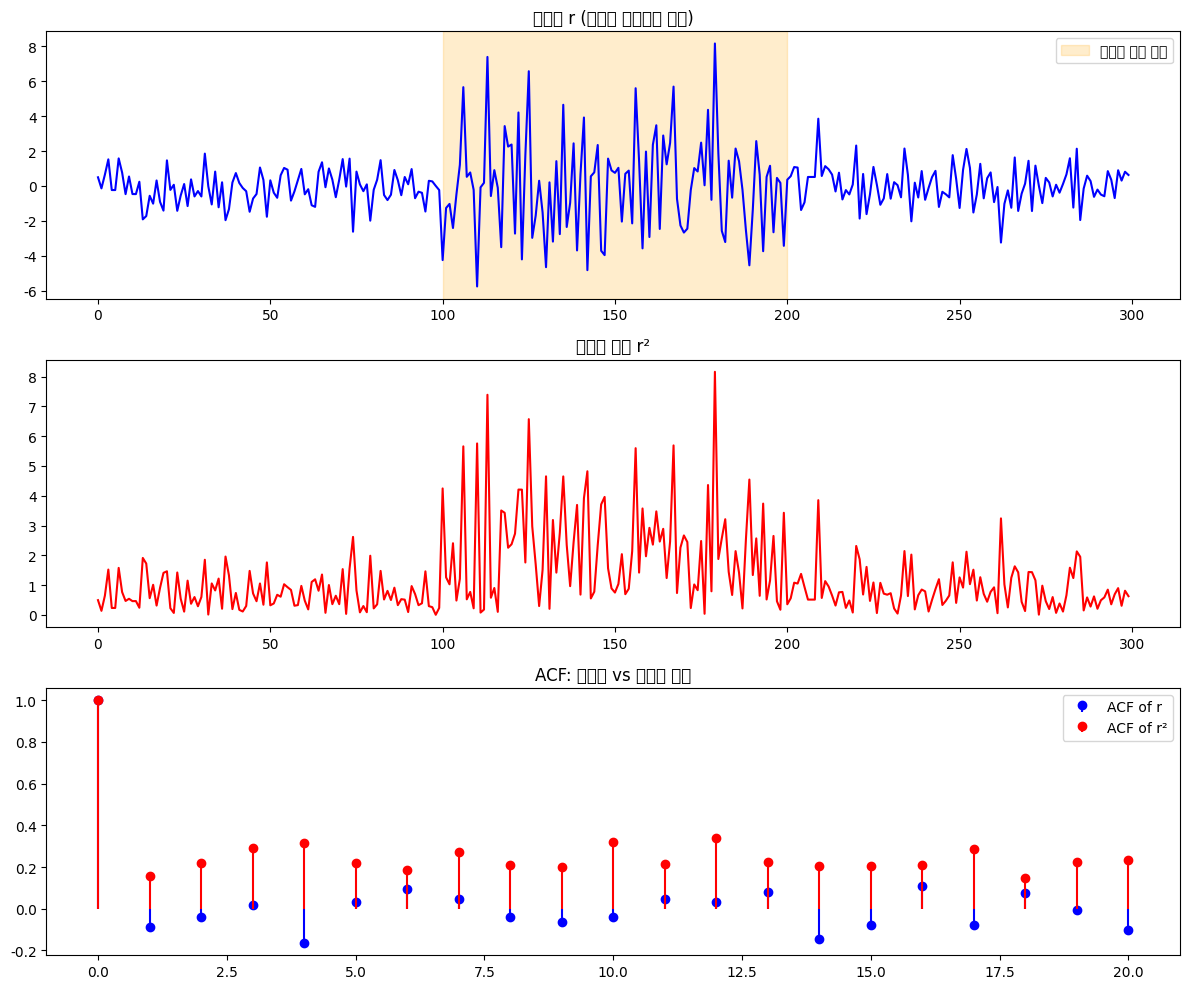

In [ ]:
# 시각화
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=False)

# 수익률 시계열
axes[0].plot(r, color='blue')
axes[0].set_title("수익률 r (변동성 클러스터 있음)")
axes[0].axvspan(100, 200, color='orange', alpha=0.2, label="변동성 증가 구간")
axes[0].legend()

# 수익률 시계열의 제곱
axes[1].plot(r_squared, color='red')
axes[1].set_title("수익률 제곱 r²")

# ACF 비교
axes[2].stem(acf_r, linefmt='b-', markerfmt='bo', basefmt=' ', label='ACF of r')
axes[2].stem(acf_r_squared, linefmt='r-', markerfmt='ro', basefmt=' ', label='ACF of r²')
axes[2].set_title("ACF: 수익률 vs 수익률 제곱")
axes[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
# 시계열 자체 시각화
plt.figure(figsize=(12, 4))
plt.plot(df, label='Synthetic Series')
plt.title("Synthetic Time Series with Strong Lag-2 Correlation")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

<Figure size 1200x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

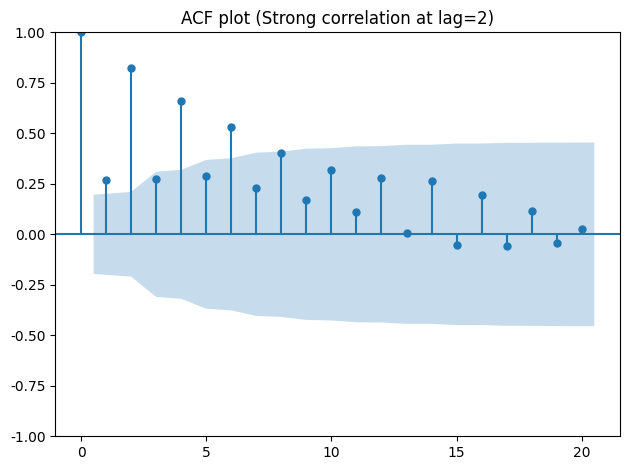

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# 시계열 데이터 생성
# 특정한 lag=2에서 강한 상관성이 나타나도록 설계
np.random.seed(42)
n = 100
base_noise = np.random.normal(0, 1, n)

# 현재값은 2칸 전 값에 의존 + 노이즈
series = np.zeros(n)
for i in range(2, n):
    series[i] = 0.9 * series[i-2] + base_noise[i]

# 시리즈를 데이터프레임으로 포장
df = pd.Series(series)

# ACF 시각화
plt.figure(figsize=(10, 4))
plot_acf(df, lags=20)
plt.title("ACF plot (Strong correlation at lag=2)")
plt.tight_layout()
plt.show()


<Figure size 1000x400 with 0 Axes>

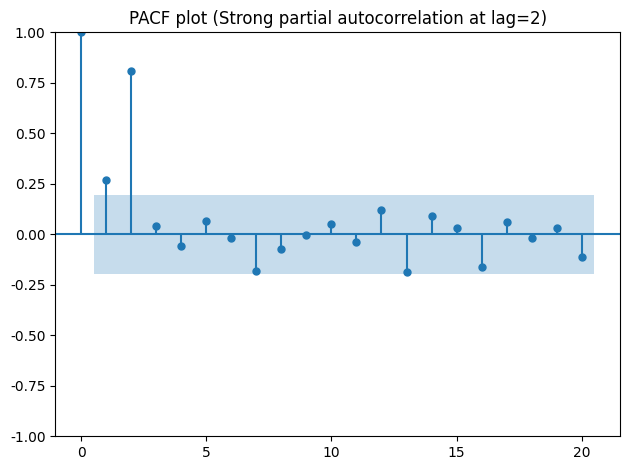

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

# PACF 시각화
plt.figure(figsize=(10, 4))
plot_pacf(df, lags=20, method='ywm')
plt.title("PACF plot (Strong partial autocorrelation at lag=2)")
plt.tight_layout()
plt.show()


# 라이브러리 설치

In [ ]:
# 그다음 pmdarima 재설치
!pip install pmdarima --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8

In [ ]:
# 먼저 NumPy를 다운그레이드 - 세션다시시작 누르기
!pip install numpy==1.23.5 --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 28.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
bigframes 2.4.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which 

# 6장 노드 코드

In [ ]:
# ② 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [ ]:
# 올바른 raw 주소
raw_url = "https://raw.githubusercontent.com/NitinBhore/Daily_Demand_Orders_Forecast/main/Daily%20Demand%20Forecasting%20Orders.csv"

import pandas as pd
df = pd.read_csv(raw_url)
df.head()

,Unnamed: 0,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [ ]:
# ④ 데이터 확인
df.columns

Index(['Unnamed: 0',
       'Week of the month (first week, second, third, fourth or fifth week',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

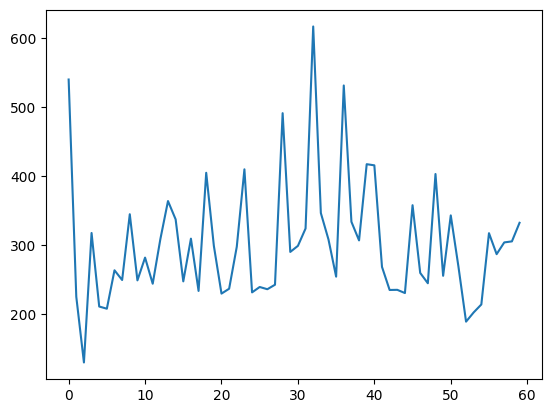

In [ ]:
# ④ 데이터 확인 및 시각화
data = df['Target (Total orders)']
plt.plot(data)
plt.show()

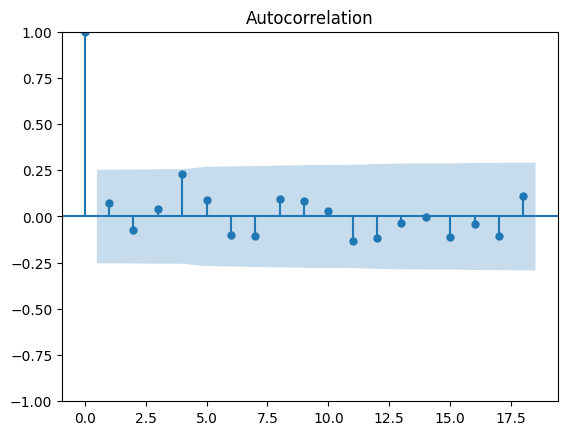

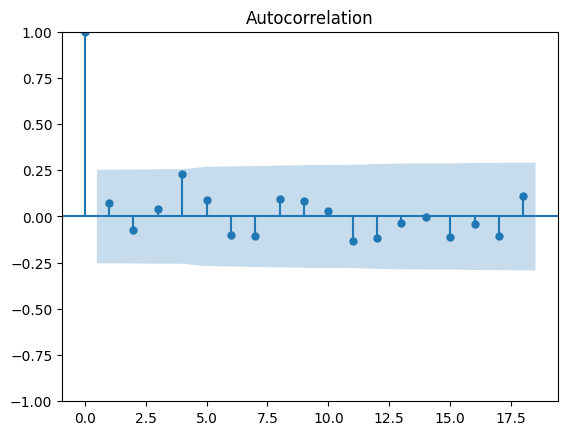

In [ ]:
# ⑤ ACF를 통한 데이터 확인 및 시각화
plot_acf(data)

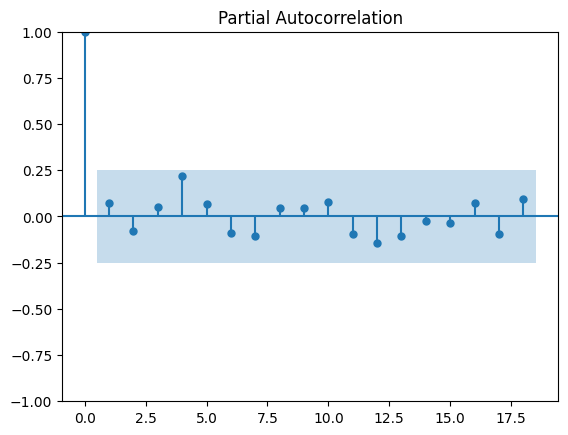

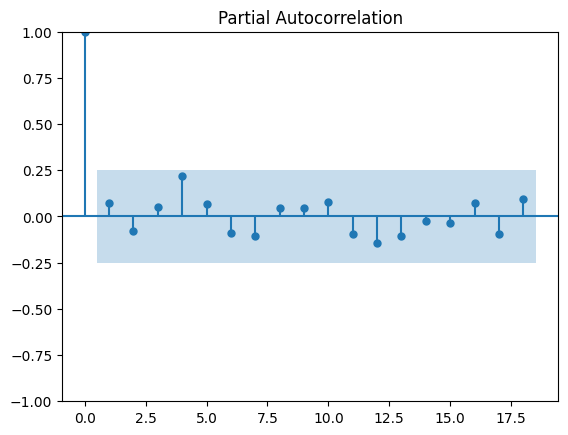

In [ ]:
# ⑤ PACF를 통한 데이터 확인 및 시각화
plot_pacf(data)

✅ ARIMA 모델 선택 기준 5가지


| 기준 번호 | 항목                      | 설명                                                                    | 우선 고려 대상 여부   |
| ----- | ----------------------- | --------------------------------------------------------------------- | ------------- |
| ①     | **적합도 지표 (AIC/BIC)**    | AIC/BIC는 모델의 전체 적합성과 복잡도 균형을 수치화한 것<br>→ **낮을수록 더 적합**                | ⭐ 매우 중요       |
| ②     | **계수 유의성 (P-value)**    | `ar.L1`, `ma.L1` 등의 계수들이 유의한가? (`p < 0.05`)<br>→ **모델 구성요소가 설명력 있는가** | ⭐ 매우 중요       |
| ③     | **잔차 진단**               | Ljung-Box, JB, H test 등으로 잔차가 무작위적인가 확인<br>→ **모델이 데이터 구조를 잘 반영했는가**  | ⭐ 매우 중요       |
| ④     | **예측 정확도 (RMSE, MAPE)** | 훈련셋 또는 테스트셋에 대한 예측값이 실제값과 얼마나 차이나는지<br>→ **실제 활용에서 중요**               | ⭐ 중요 (실무용일 때) |
| ⑤     | **모델의 단순성과 해석 가능성**     | 비슷한 성능이라면 파라미터 수가 적고 해석하기 쉬운 모델 선호<br>→ **복잡성은 불리함**                  | ⚠️ 보조 기준      |


🎯 어떤 모델이 적합한가? 목적별 추천 기준

| 분석 목적           | 주요 선택 기준                   | 모델 예시                        |
| --------------- | -------------------------- | ---------------------------- |
| **설명 중심 분석**    | AIC 낮고, 계수 유의, 단순한 모델 선호   | ARIMA(0,0,1), ARIMA(1,0,0) 등 |
| **정책 보고/의사결정**  | 해석 쉬움 + 잔차 안정성 + 계수 유의성    | ARIMA(1,0,0) 등               |
| **실무 예측 / 자동화** | RMSE/MAPE 낮음 + 과적합 방지      | 최종 테스트셋에서 비교 후 선택            |
| **연구용/출판용**     | AIC/BIC + 정규성 + 해석 + 예측 균형 | 예: ARIMA + SARIMA 비교 포함      |


📌 요약: 가장 적합한 모델은?
*  AIC가 낮고
*  계수가 유의하며
*  잔차에 자기상관이 없고 정규성/등분산성이 만족되며
*  (예측 모델일 경우) 예측오차가 낮고, 과하지 않게 단순한 모델

In [ ]:
# ⑥ ARIMA 적용
model1 = ARIMA(data, order=(1,0,0))
model2 = ARIMA(data, order=(0,0,1))
model3 = ARIMA(data, order=(1,0,1))

res1 = model1.fit()
res2 = model2.fit()
res3 = model3.fit()

⑦ ARIMA 결과 확인

fittedvalues : 주어진 값 x를 회귀 방정식에 대입해서 결과를 알려줍니다.
y
^
y
^
​
  는 모델을 거쳐서 나온 예측된 결과로 부를 수 있습니다.
y
i
^
=
b
0
+
b
1
x
i
y
i
​

^
​
 =b
0
​
 +b
1
​
 x
i
​
  : 수식에서 y는 적합된 값(fitted value)입니다.
e
t
=
y
t
−
y
t
^
e
t
​
 =y
t
​
 −
y
t
​

^
​
  : 수식에서 e는 잔차 입니다. 잔차는 관측치와 해당 적합된 값 사이의 차이와 같습니다.
시각화를 통해 fitted value를 데이터셋과 비교해 봅니다.

In [ ]:
# ⑦ ARIMA 결과 확인
print(res1.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Target (Total orders)   No. Observations:                   60
Model:                    ARIMA(1, 0, 0)   Log Likelihood                -354.181
Date:                   Mon, 26 May 2025   AIC                            714.362
Time:                           05:32:30   BIC                            720.645
Sample:                                0   HQIC                           716.819
                                    - 60                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        301.0429     17.323     17.378      0.000     267.090     334.995
ar.L1          0.0804      0.187      0.430      0.667      -0.286       0.447
sigma2      7848.5794   1363

✅ ARIMA(0,0,1) 결과 해석 요약

| 변수       | 의미                          | 회귀분석과의 차이                         |
| -------- | --------------------------- | --------------------------------- |
| `const`  | 시계열의 평균 수준 (intercept)      | 회귀의 절편과 유사                        |
| `ma.L1`  | 1차 이동평균 (Moving Average) 계수 | 회귀에서는 lag term X가 없음              |
| `sigma2` | 잔차(오차)의 분산                  | 회귀의 MSE와 유사하지만, ARIMA에서는 필수 출력 항목 |



In [ ]:
print(res2.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Target (Total orders)   No. Observations:                   60
Model:                    ARIMA(0, 0, 1)   Log Likelihood                -354.143
Date:                   Mon, 26 May 2025   AIC                            714.286
Time:                           05:36:17   BIC                            720.569
Sample:                                0   HQIC                           716.743
                                    - 60                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        301.3222     17.628     17.094      0.000     266.772     335.872
ma.L1          0.0982      0.179      0.548      0.583      -0.253       0.449
sigma2      7837.9601   1382

In [ ]:
print(res3.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Target (Total orders)   No. Observations:                   60
Model:                    ARIMA(1, 0, 1)   Log Likelihood                -354.075
Date:                   Mon, 26 May 2025   AIC                            716.150
Time:                           05:36:22   BIC                            724.528
Sample:                                0   HQIC                           719.427
                                    - 60                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        301.2370     17.534     17.180      0.000     266.871     335.603
ar.L1         -0.2589      1.442     -0.180      0.857      -3.085       2.567
ma.L1          0.3581      1

#
# 6. 통계 모델을 통한 시계열 예측

## ✅ ARIMA 모델 3종 비교 요약 (실제 결과 기반)

### 📊 정량 비교표

| 항목 | ARIMA(0,0,1) | ARIMA(1,0,0) | ARIMA(1,0,1) |
| --- | --- | --- | --- |
| **AIC** | **714.29** | 714.36 | 716.15 |
| **BIC** | 720.57 | **720.65** | 724.53 |
| **Log Likelihood** | -354.14 | -354.18 | -354.08 |
| **const** (p) | 301.32 (0.000) | 301.04 (0.000) | 301.24 (0.000) |
| **AR(1) p-value** | — | 0.667 (유의X) | 0.857 (유의X) |
| **MA(1) p-value** | 0.583 (유의X) | — | 0.794 (유의X) |
| **Ljung-Box (잔차 자기상관)** | 0.88 | **0.99** | 0.87 |
| **Jarque-Bera (정규성)** | 0.00 (부족) | 0.00 (부족) | 0.00 (부족) |
| **Heteroskedasticity (p)** | 0.17 | 0.18 | 0.18 |
| **Skew / Kurtosis** | 1.41 / 5.28 | 1.40 / 5.28 | 1.43 / 5.31 |

### 🧠 종합 해석

| 모델 | 장점 | 단점 | 해석 |
| --- | --- | --- | --- |
| **ARIMA(0,0,1)** | 가장 낮은 AIC모델 단순잔차 자기상관 없음 | 계수(MA) 유의하지 않음잔차 정규성 부족 | **베이스라인 모델로 매우 적절** |
| **ARIMA(1,0,0)** | 잔차 자기상관 가장 없음간단한 모델 | AR 계수 유의하지 않음AIC는 (0,0,1)보다 살짝 높음 | **성능 유사한 대체 모델** |
| **ARIMA(1,0,1)** | 모델 복잡도 높음 (AR+MA) | AIC 가장 높음계수 모두 유의하지 않음해석 어려움 | **과적합 가능성 → 비추천** |

### ✅ 결론: 어떤 모델을 선택할까?

| 목적 | 추천 모델 | 이유 |
| --- | --- | --- |
| **설명력 중심 분석** | **ARIMA(0,0,1)** | 가장 단순하고 AIC 가장 낮음. 해석 용이. |
| **잔차 안정성 중시** | **ARIMA(1,0,0)** | 잔차의 자기상관이 가장 없음 (Ljung-Box p = 0.99). |
| **예측력 중심 (추가 확인 필요)** | → 예측 오차 (RMSE, MAPE) 비교 필요 | 현재 세 모델 모두 계수 유의성은 낮음. 추후 테스트셋 예측 비교 권장. |



In [ ]:
predictions = res2.fittedvalues

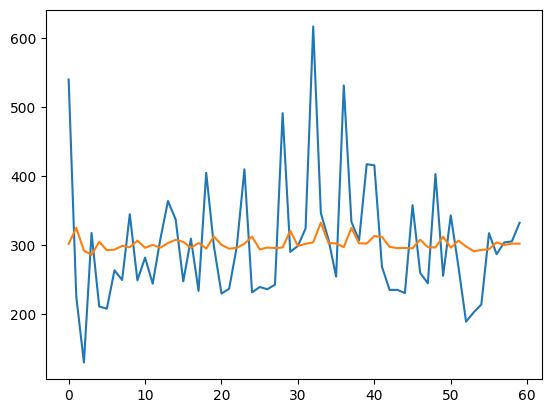

In [ ]:
plt.figure()
plt.plot(data)
plt.plot(predictions)
plt.show()

In [ ]:
# ⑧ Auto ARIMA 적용
model = pm.AutoARIMA(seasonal=False, stepwise=True, suppress_warnings=True, trace=True)

In [ ]:
res = model.fit(data)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=862.092, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=747.489, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=818.332, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=741.019, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=735.047, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.29 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=724.987, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=723.726, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=722.186, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=791.913, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=716.399, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=714.286, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=712.710, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=714.363, Time=0.06 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 2.556 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


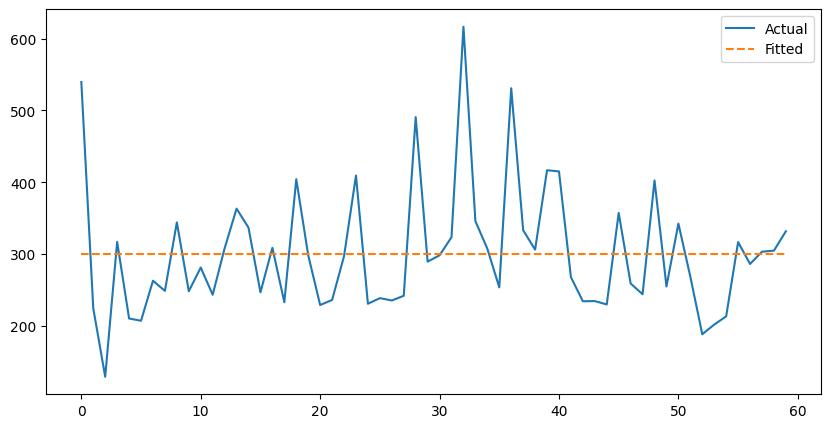

In [ ]:
# ✅ 적합값 가져오기 (in-sample prediction)
predictions = model.predict_in_sample()

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(data, label='Actual')
plt.plot(predictions, label='Fitted', linestyle='--')
plt.legend()
plt.show()